/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


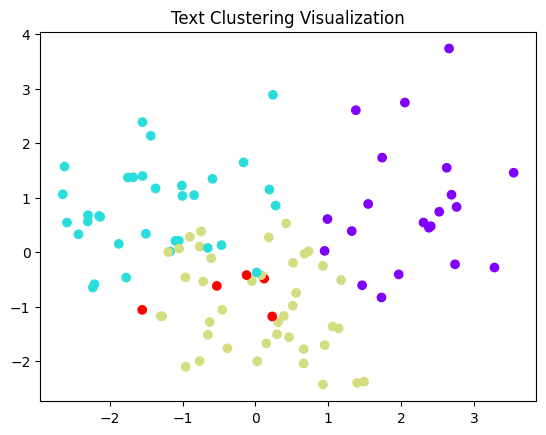

In [8]:
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
import torch


# Load model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Load dataset (AG News)
dataset = load_dataset("ag_news", split="train[:100]")  # Limiting to 100 samples for simplicity
texts = dataset['text']

# Tokenize and encode the text into embeddings
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    embeddings = model(**tokens).last_hidden_state[:, 0, :].numpy()  # Use the [CLS] token for embeddings

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='rainbow')
plt.title("Text Clustering Visualization using PCA")
plt.show()


In [5]:
# !pip install datasets
# !pip install transformers
# !pip install scikit-learn
# !pip install matplotlib


In [4]:
# !pip install torch
# !pip install umap-learn



import umap


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


README.md:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.69M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3270 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


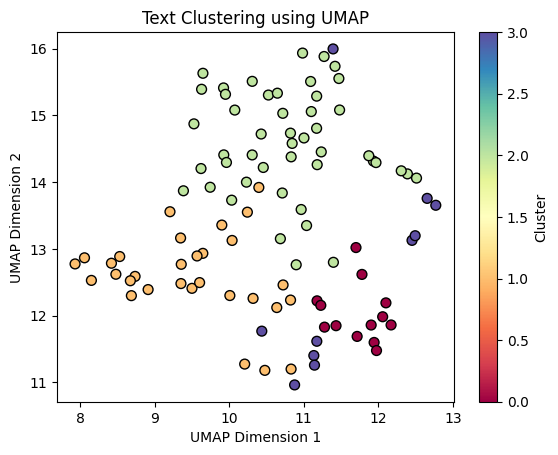

In [6]:
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
import torch

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Load dataset (BoolQ)
dataset = load_dataset("google/boolq", split="train[:100]")  # Limiting to 100 samples for simplicity
texts = dataset['question']

# Tokenize and encode the text into embeddings
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    embeddings = model(**tokens).last_hidden_state[:, 0, :].numpy()  # Use the [CLS] token for embeddings

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Reduce embeddings to 2 dimensions using UMAP
reducer = umap.UMAP(n_components=2)
reduced_embeddings = reducer.fit_transform(embeddings)

# Plot the 2D UMAP clustering
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='Spectral', edgecolor='k', s=50)
plt.colorbar(label='Cluster')
plt.title("Text Clustering using UMAP")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


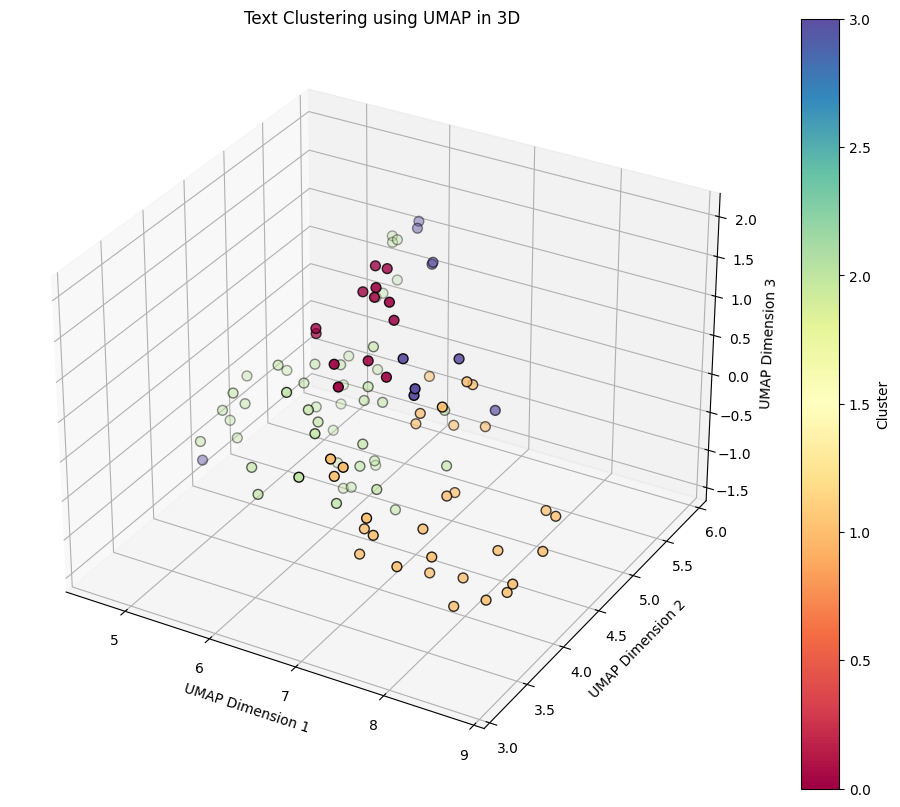

In [7]:
# Reduce embeddings to 3 dimensions using UMAP
reducer = umap.UMAP(n_components=3)
reduced_embeddings = reducer.fit_transform(embeddings)

# Plot the 3D UMAP clustering
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2],
                     c=clusters, cmap='Spectral', edgecolor='k', s=50)
plt.colorbar(scatter, label='Cluster')
ax.set_title("Text Clustering using UMAP in 3D")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")
plt.show()


In [8]:
import plotly.express as px

# Reduce embeddings to 3 dimensions using UMAP
reducer = umap.UMAP(n_components=3)
reduced_embeddings = reducer.fit_transform(embeddings)

# Create a DataFrame for Plotly
import pandas as pd
df = pd.DataFrame(reduced_embeddings, columns=['UMAP Dimension 1', 'UMAP Dimension 2', 'UMAP Dimension 3'])
df['Cluster'] = clusters

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df, x='UMAP Dimension 1', y='UMAP Dimension 2', z='UMAP Dimension 3', color='Cluster',
                    title="Text Clustering using UMAP in 3D",
                    labels={'UMAP Dimension 1': 'UMAP Dimension 1', 'UMAP Dimension 2': 'UMAP Dimension 2', 'UMAP Dimension 3': 'UMAP Dimension 3'})

# Customize the layout
fig.update_layout(scene=dict(
                    xaxis_title='UMAP Dimension 1',
                    yaxis_title='UMAP Dimension 2',
                    zaxis_title='UMAP Dimension 3'),
                    margin=dict(r=0, l=0, b=0, t=0))

# Show the interactive plot
fig.show()


In [9]:
from sklearn.manifold import TSNE

# Reduce embeddings to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

# Create a DataFrame for Plotly
df_tsne = pd.DataFrame(tsne_embeddings, columns=['t-SNE Dimension 1', 't-SNE Dimension 2'])
df_tsne['Cluster'] = clusters
df_tsne['Text'] = texts  # Add text data for hover information

# Create an interactive 2D scatter plot
fig_tsne = px.scatter(df_tsne, x='t-SNE Dimension 1', y='t-SNE Dimension 2', color='Cluster',
                      title="Text Clustering using t-SNE",
                      labels={'t-SNE Dimension 1': 't-SNE Dimension 1', 't-SNE Dimension 2': 't-SNE Dimension 2'},
                      hover_data={'Text': True})  # Show text on hover

# Customize the layout
fig_tsne.update_layout(margin=dict(r=0, l=0, b=0, t=0))

# Show the interactive plot
fig_tsne.show()


In [10]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go

# Create a graph
G = nx.Graph()

# Add nodes with cluster information
for i, text in enumerate(texts):
    G.add_node(i, label=text, cluster=clusters[i])

# Add edges based on similarity
num_samples = len(texts)
for i in range(num_samples):
    for j in range(i + 1, num_samples):
        if clusters[i] == clusters[j]:
            G.add_edge(i, j)

# Position nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Extract node positions and clusters
x = [pos[i][0] for i in G.nodes()]
y = [pos[i][1] for i in G.nodes()]
cluster = [G.nodes[i]['cluster'] for i in G.nodes()]
text = [G.nodes[i]['label'] for i in G.nodes()]

# Create a scatter plot
fig_network = go.Figure()

fig_network.add_trace(go.Scatter(x=x, y=y, mode='markers+text',
                                 marker=dict(color=cluster, colorscale='Viridis', size=10),
                                 text=text, textposition='top center',
                                 hoverinfo='text'))

fig_network.update_layout(title="Interactive Network Graph of Clusters",
                          showlegend=False,
                          xaxis_title='X',
                          yaxis_title='Y')

# Show the interactive plot
fig_network.show()


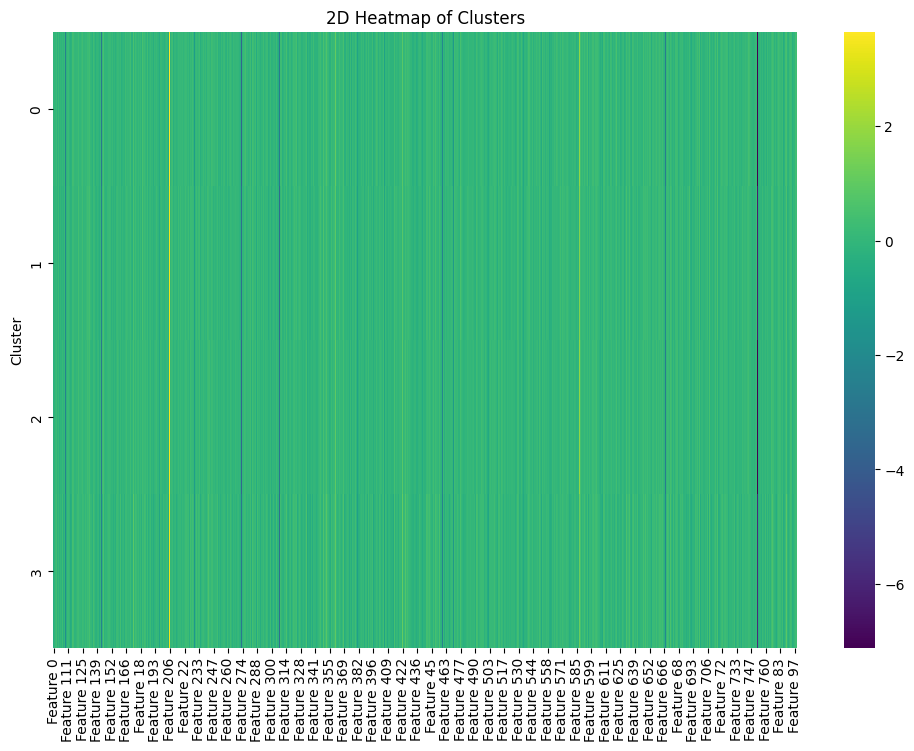

In [11]:
import seaborn as sns

# Create a DataFrame for heatmap
heatmap_data = pd.DataFrame(embeddings, columns=[f'Feature {i}' for i in range(embeddings.shape[1])])
heatmap_data['Cluster'] = clusters

# Pivot data for heatmap
heatmap_pivot = heatmap_data.pivot_table(index='Cluster', values=[f'Feature {i}' for i in range(embeddings.shape[1])])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap='viridis', annot=False)
plt.title("2D Heatmap of Clusters")
plt.show()


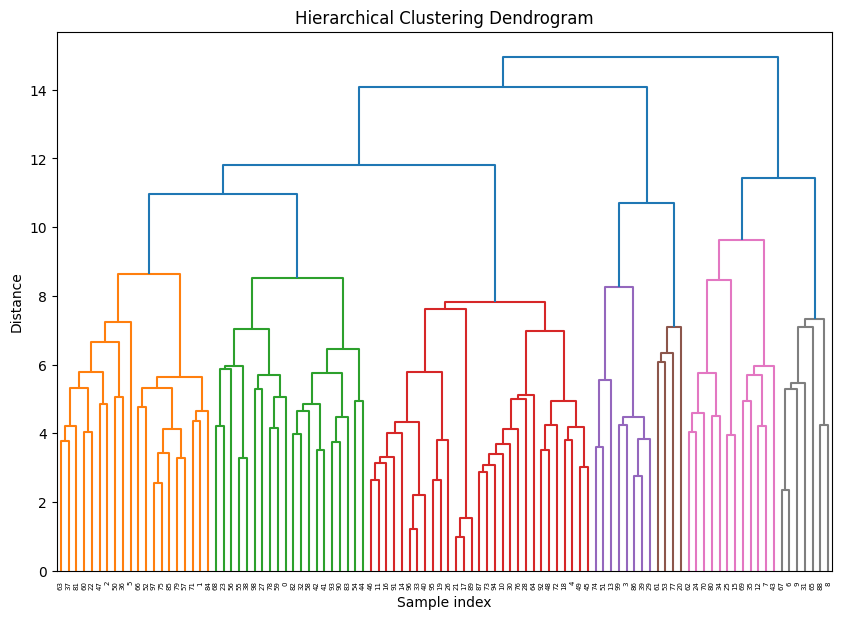

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(embeddings, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
